# Prac 3

### Pandas: Data Exploration

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
#this command displays figures in Jupyter Notebook:
%matplotlib inline
import seaborn as sns

In [14]:
chipotle = pd.read_csv('C:/Users/Charlotte Mathews/Desktop/Tutoring/STK353/Untitled Folder/chipotle.tsv', sep = '\t')

chipotle.head(15)
# chipotle.info()

# chipotle['order_id'].unique()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


##### What was the total revenue generated by Chipotle over the 1834 orders?

In [16]:
chipotle['item_price'] = chipotle['item_price'].replace("\$", "", regex=True).astype(float)

# Calculate total revenue
total_revenue = chipotle['item_price'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $34500.16


##### What is the average price of an order at Chipotle?

In [6]:
average_order_price = chipotle.groupby('order_id')['item_price'].sum().mean()
print(f"Average Order Price: ${average_order_price:.2f}")



Average Order Price: $18.81


##### What is the most frequently ordered item at Chipotle? (How many times was it ordered?)

In [9]:
pop = chipotle['item_name'].value_counts().idxmax()
times_ordered = chipotle['item_name'].value_counts().max()
print(f"Most Popular Item: {pop}")
print(f"Ordered {times_ordered} times")



Most Popular Item: Chicken Bowl
Ordered 726 times


##### What are the top 10 most frequently ordered items? How many times were they ordered in total?

In [10]:
top_items = chipotle['item_name'].value_counts().head(10)
print(f"Top 10 Items:\n{top_items}")

Top 10 Items:
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


##### If Chipotle decides to increase all item prices by 10%, what will be the impact on the total revenue?

In [11]:
adjusted_data = chipotle.copy()
adjusted_data['adjusted_item_price'] = adjusted_data['item_price'] * 1.10
new_total_revenue = adjusted_data['adjusted_item_price'].sum()
revenue_increase = new_total_revenue - total_revenue
print(f"New Total Revenue (with 10% price increase): ${new_total_revenue:.2f}")
print(f"Revenue Increase: ${revenue_increase:.2f}")


New Total Revenue (with 10% price increase): $37950.18
Revenue Increase: $3450.02


##### How many unique items are typically included in an order? What's the distribution of the number of items in an order?

Average Unique Items per Order: 2.34


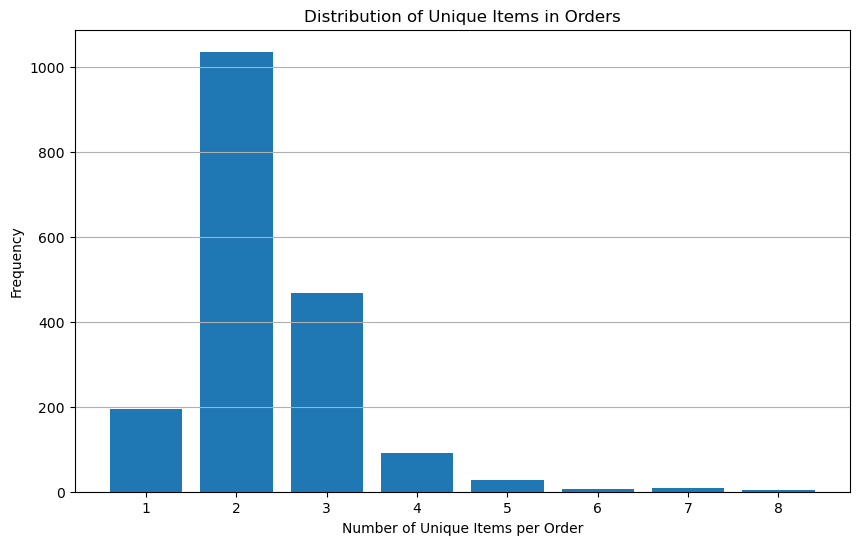

In [12]:
unique_items_per_order = chipotle.groupby('order_id')['item_name'].nunique()

average_unique_items_per_order = unique_items_per_order.mean()
print(f"Average Unique Items per Order: {average_unique_items_per_order:.2f}")

plt.figure(figsize=(10, 6))
plt.hist(unique_items_per_order, bins=range(1, unique_items_per_order.max() + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Unique Items per Order')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Items in Orders')
plt.xticks(range(1, unique_items_per_order.max() + 1))
plt.grid(axis='y')
plt.show()

##### What's the average difference of order frequency and order price between burritos and bowls?

In [13]:
chipotle['item_type'] = chipotle['item_name'].apply(lambda x: 'Burrito' if 'Burrito' in x else 'Bowl')

avg_order_frequency = chipotle.groupby('item_type')['order_id'].nunique()
avg_order_price = chipotle.groupby('item_type')['item_price'].mean()

average_diff_frequency = avg_order_frequency['Burrito'] - avg_order_frequency['Bowl']
average_diff_price = avg_order_price['Burrito'] - avg_order_price['Bowl']

print(f"Average Difference of Order Frequency: {average_diff_frequency:.2f}")
print(f"Average Difference of Order Price: ${average_diff_price:.2f}")


Average Difference of Order Frequency: -764.00
Average Difference of Order Price: $3.60


##### What's the average price of each type of item (burrito, bowl, etc.)? Are there any trends or differences in pricing?

In [17]:
average_price_per_item = chipotle.groupby('item_name')['item_price'].mean()
print("Average Price per Item Type:\n", average_price_per_item)

Average Price per Item Type:
 item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          1

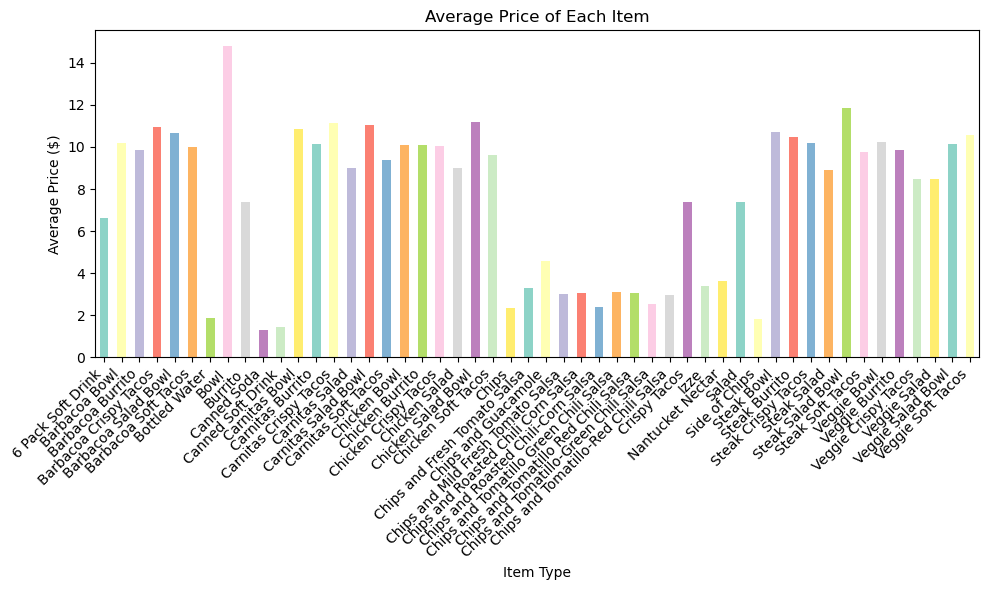

In [22]:
num_items = len(average_price_per_item)

color_palette = sns.color_palette("Set3", n_colors=num_items)

plt.figure(figsize=(10, 6))
ax = average_price_per_item.plot(kind='bar', color=color_palette)
plt.xlabel('Item Type')
plt.ylabel('Average Price ($)')
plt.title('Average Price of Each Item')
plt.xticks(range(num_items), average_price_per_item.index, rotation=45)
ax.set_xticklabels(average_price_per_item.index, rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Data cleaning/filtering

##### Drop duplicate rows and rows with missing values

In [27]:

cleaned = chipotle.dropna()

cleaned = cleaned.drop_duplicates()

# cleaned.info()
# chipotle.info()
# chipotle.head(15)

### Transformations on the filtered data

##### Calculate the total cost for each order

In [28]:
cleaned['total_cost'] = cleaned['quantity'] * cleaned['item_price']

# cleaned.head()

,order_id,quantity,item_name,choice_description,item_price,total_cost
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75


##### Find the top 10 selling items based on the quantity ordered.

In [29]:
top_ten = cleaned.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)
print(f"Top 10 Items:\n{top_ten}")

Top 10 Items:
item_name
Chicken Bowl          752
Chicken Burrito       584
Steak Burrito         383
Canned Soft Drink     340
Steak Bowl            220
Canned Soda           124
Chicken Salad Bowl    123
Chicken Soft Tacos    116
Veggie Burrito         97
Barbacoa Burrito       90
Name: quantity, dtype: int64


##### What is the most common choice description?

In [31]:
common_choice = cleaned.groupby('item_name')['choice_description'].apply(lambda x: x.value_counts().idxmax())
common_choice[0:1,]

item_name
6 Pack Soft Drink    [Diet Coke]
Name: choice_description, dtype: object

##### What is the new total revenue?

In [33]:
tot_revenue = cleaned['total_cost'].sum()
print(f"Filtered Total Revenue: ${tot_revenue:.2f}")
diff = total_revenue - tot_revenue
print(f"Differenc in revenue: ${diff:.2f}")

Filtered Total Revenue: $33326.56
Differenc in revenue: $1173.60
